# Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sympy as sym

# Funciones utilizadas

## Funciones para hallar los coeficientes de la regresión

In [ ]:
# La función armar_tupla_VA se encarga de poner los valores absolutos del
# dataframe y las edades en arreglos y juntarlos como tupla.
def armar_tupla_VA(df_final):
  x = np.array(df_final.iloc[:, 0])
  y = np.array(df_final.iloc[:, 1])
  return (x, y)

In [ ]:
# La función armar_dataset se encarga de armar el dataset de valores útiles para la regresión.
def armar_dataset(x, y):
  xy = x*y
  x_2 = x**2
  x_3 = x**3
  x_4 = x**4
  x_2y = x**2 * y
  columnas = ["x", "y", "xy", "x^2", "x^3", "x^4", "x^2y"]
  dataset = pd.DataFrame([x, y, xy, x_2, x_3, x_4, x_2y])
  dataset = dataset.transpose()
  dataset = dataset.rename(columns = {0: "x", 1: "y", 2: "xy", 3: "x^2", 4: "x^3", 5: "x^4", 6: "x^2y"})
  return dataset

In [ ]:
# La función obtener_sumatoria_array se encarga de obtener la suma de un array.
def obtener_sumatoria_array(array):
  sumatoria = np.sum(array)
  return sumatoria

In [ ]:
# La función obtener_lista_sumatorias se encarga de obtener las listas de sumatorias
# del dataset.
def obtener_lista_sumatorias(dataset, n_columnnas):
  lista_sumatorias = []
  for i in range(0, n_columnnas):
    sumatoria = obtener_sumatoria_array(dataset.iloc[:, i])
    lista_sumatorias.append(sumatoria)
  return lista_sumatorias

In [ ]:
# La función obtener_numero_filas se encarga de obtener el número de filas del dataframe.
def obtener_numero_filas(dataset):
  return len(dataset)

In [ ]:
# La función obtener_numero_filas se encarga de obtener el número de columnas del dataframe.
def obtener_numero_columnas(dataset):
  return len(dataset.columns)

In [ ]:
# La función armar_matrices_igualdad se encarga de armar la igualdad de matrices.
def armar_matrices_igualdad(lista_sumatorias, n):
  matrizA = [[n, lista_sumatorias[0], lista_sumatorias[3]], [lista_sumatorias[0], lista_sumatorias[3], lista_sumatorias[4]],
            [lista_sumatorias[3], lista_sumatorias[4], lista_sumatorias[5]]]
  matrizB = [lista_sumatorias[1], lista_sumatorias[2], lista_sumatorias[6]]
  return (matrizA, matrizB)

In [ ]:
# Funcion para encontrar el minimo comun multiplo de dos numeros
def multiplicador(numero1,numero2):
    mcm = math.lcm(numero1, numero2)
    return mcm/numero1, mcm/numero2

# Funcion para multiplicar una fila especifica de la matriz
def fila_multiplicar(matriz,factor,fila):
    for i in range(len(matriz[fila])):
        if(i != len(matriz[fila])-1):
            matriz[fila][i] = int(factor*matriz[fila][i])
        else:
            matriz[fila][i] *= factor

In [ ]:
def cambiar_fila(matriz,auxiliar,fila,diagonal1,diagonal2):
    if(diagonal1>0 and diagonal2>0)or(diagonal1<0 and diagonal2<0):
        for i in range(len(matriz[fila])):
            if(i != len(matriz[fila])-1):
                matriz[fila][i] = int(matriz[fila][i]-auxiliar[i])
            else:
                matriz[fila][i] -= auxiliar[i]
    else:
        for i in range(len(matriz[fila])):
            if(i != len(matriz[fila])-1):
                matriz[fila][i] = int(matriz[fila][i]+auxiliar[i])
            else:
                matriz[fila][i] += auxiliar[i]

#Funcion para multiplicar la fila auxiliar
def aux_multiplicar(fila,factor):
    for i in range(len(fila)):
        fila[i] *= factor

In [ ]:
# Funcion que crea una matriz escalada
def eliminacionGausseana(matriz):
    diagonal = 0

    for fila in matriz:

        if(diagonal == len(matriz)-1):break

        for i in range(diagonal+1,len(matriz)):
            fila_aux = list(fila)

            if(matriz[i][diagonal] != 0):
                mult1,mult2 = multiplicador(fila_aux[diagonal],matriz[i][diagonal])
                fila_multiplicar(matriz,mult2,i)
                aux_multiplicar(fila_aux,mult1)
                cambiar_fila(matriz,fila_aux,i,fila_aux[diagonal],matriz[i][diagonal])

        diagonal += 1

    return matriz

In [ ]:
#Resuelve la matriz escalonada hecho con la eliminacion gausseana
def resuelve(matriz):
    num_filas = len(matriz)
    solucion = [0] * num_filas

    for i in range(num_filas - 1, -1, -1):
        suma = 0

        for j in range(i + 1, num_filas):
            suma += matriz[i][j] * solucion[j]

        solucion[i] = (matriz[i][-1] - suma) / matriz[i][i]

    return solucion

In [ ]:
# Función para reescribir la matriz para efectos de la formula a utilizar.
def reescribir_matriz(ecuacion_matricial):
    matriz = [ecuacion_matricial[0][0], ecuacion_matricial[0][1],ecuacion_matricial[0][2]]
    matriz[0].append(ecuacion_matricial[1][0])
    matriz[1].append(ecuacion_matricial[1][1])
    matriz[2].append(ecuacion_matricial[1][2])

    for i in range(0, 3):
        for j in range(0, 4):
            matriz[i][j] = int(matriz[i][j])

    return matriz

In [ ]:
# La función func se encarga de obtener la imagen de la función matemática trabajada.
def func(a0, a1, a2, x):
    return a0 + a1 * x + a2 * x**2

## Visualización

In [ ]:
# La función fuvisualizar_regresion_cuadratica se encarga de realizar la visualización de la regresión.
def visualizar_regresion_cuadratica(x, y, a0, a1, a2, name):
    plt.figure()
    plt.plot(x, y, 'o', color = 'black', label = 'Datos del csv')
    plt.plot(x, func(a0, a1, a2, x), color = 'black', label = 'Modelo resultante')
    plt.title(f"Regresión Cuadrática entre la edad y el {name}")
    plt.gca().set_facecolor('lightgray')
    plt.grid()
    plt.show()

## Ajustar la curva para que no arroje valores negativos

In [ ]:
# Comprobar que la funcion no de valores negativos
def verificar(a0, a1, a2, x)->bool:
    for i in range(126):
        if func(a0,a1,a2,i) < 0:
            return False
    return True

In [ ]:
# Error cuadratico medio
# Para calcular este tipo errror:
# Primero se hace la sumatoria del valor real menos el valor aproximado de la funcion calculada
# A ese resultado se le eleva al cuadrado y asi con todos los datos.
# La sumatoria anteriormente calculada se le divide por la cantidad totales de datos
# Finalmente a ese valor se le calcula la raiz cuadrada.
def ecm(confirmado,a0,a1,a2):
    suma = 0
    for i in range(len(confirmado)):
        suma += (confirmado[i] - func(a0,a1,a2,i))**2

    return math.sqrt(suma/len(confirmado))

In [ ]:
# Ajustar a1 por la derecha
# Al a1 calculado se le va sumando la tasa, cada a1 nuevo se le calcula
# Error cuadratico medio y se va guardando el a1 con el menor error cuadratico medio

def a1_optimo_positivo(confirmado,a0,a1,a2,tasa):
    a1_optimo = a1
    error_menor = 1000
    for i in range(1000):
        error_actual = ecm(confirmado,0, a1, a2)
        if(error_actual < error_menor):
            if verificar(0,a1,a2,i):
                error_menor = error_actual
                a1_optimo = a1
        a1 += tasa

    print(f"{a1_optimo} :: ecm { ecm(confirmado,0, a1_optimo, a2)}")
    return a1_optimo

# Ajustar a1 por la izquierda
# Al a1 calculado se le va restando la tasa, cada a1 nuevo se le calcula
# Error cuadratico medio y se va guardando el a1 con el menor error cuadratico medio
def a1_optimo_negativo(confirmado,a0,a1,a2,tasa):
    a1_optimo = a1
    error_menor = 1000
    for i in range(1000):
        error_actual = ecm(confirmado,0, a1, a2)
        if(error_actual < error_menor):
            if verificar(0,a1,a2,i):
                error_menor = error_actual
                a1_optimo = a1
        a1 -= tasa

    print(f"{a1_optimo} :: ecm { ecm(confirmado,0, a1_optimo, a2)}")
    return a1_optimo

In [ ]:
# Ajustar a2 por la derecha
# Al a2 calculado se le va sumar la tasa, cada a2 nuevo se le calcula
# Error cuadratico medio y se va guardando el a2 con el menor error cuadratico medio
def a2_optimo_positivo(confirmado,a0,a1,a2,tasa):
    a2_optimo = a2
    error_menor = 1000
    for i in range(1000):
        error_actual = ecm(confirmado,0, a1, a2)
        if(error_actual < error_menor):
            error_menor = error_actual
            a2_optimo = a2
        a2 += tasa

    print(f"{a2_optimo} :: ecm { ecm(confirmado,0, a1, a2_optimo)}")
    return a2_optimo

# Ajustar a2 por la izquierda
# Al a2 calculado se le va restar la tasa, cada a2 nuevo se le calcula
# Error cuadratico medio y se va guardando el a2 con el menor error cuadratico medio
def a2_optimo_negativo(confirmado,a0,a1,a2,tasa):
    a2_optimo = a2
    error_menor = 1000
    for i in range(1000):
        error_actual = ecm(confirmado,0, a1, a2)
        if(error_actual < error_menor):
            error_menor = error_actual
            a2_optimo = a2
        a2 -= tasa

    print(f"{a2_optimo} :: ecm { ecm(confirmado,0, a1, a2_optimo)}")
    return a2_optimo

In [ ]:
# La función separar_en_tramos se encarga de separar el dataframe en dos tramos según valores absolutos.
def conseguir_edad_peak(df_final):
    fila = df_final[df_final.iloc[:, 1] == df_final.iloc[:, 1].max()]
    edad_peak = int(fila.iloc[:, 0])
    return edad_peak

# Función que realiza el llamado a las demás funciones para generar la visualización

In [ ]:
def obtener_coeficientes_funciones(df_final):
  tupla_VA = armar_tupla_VA(df_final)
  dataset_VA = armar_dataset(tupla_VA[0], tupla_VA[1])

  n_filas_VA = obtener_numero_filas(dataset_VA)
  n_columnas_VA = obtener_numero_columnas(dataset_VA)

  lista_sumatorias_VA = obtener_lista_sumatorias(dataset_VA, n_columnas_VA)

  ecuacion_matricial_VA = armar_matrices_igualdad(lista_sumatorias_VA, n_filas_VA)

  matriz_VA = reescribir_matriz(ecuacion_matricial_VA)
  matriz_triangulada_VA = eliminacionGausseana(matriz_VA)

  solucion_coeficientes_VA = resuelve(matriz_triangulada_VA)

  print(f"y = {solucion_coeficientes_VA[0]} + {solucion_coeficientes_VA[1]} * x - {abs(solucion_coeficientes_VA[2])} * x^2")

  return solucion_coeficientes_VA

# Desarrollo: Trabajo con Fallecidos



## Importar datos

In [ ]:
df = pd.read_csv("df_deis_edad.csv")
df_aux = df
df = df_aux.groupby(["edad"], dropna = True)["confirmada"].sum()
df = df.reset_index()
df_final = df
df_final

,edad,confirmada
0,1,11.0
1,2,11.0
2,3,5.0
3,4,7.0
4,5,6.0
...,...,...
107,108,1.0
108,109,1.0
109,110,0.0
110,111,1.0


## Edad Peak Fallecidos

In [ ]:
edad_peak_f = conseguir_edad_peak(df_final)
print("La edad peak de los fallecidos es", edad_peak_f)

La edad peak de los fallecidos es 80


## Obtener Función cuadrática de correlación a través de regresión cuadrática

In [ ]:
sol0 = obtener_coeficientes_funciones(df_final)

y = -556.5908480046509 + 38.47333881028517 * x - 0.2736785562764319 * x^2


## Coeficientes Solución

Se puede ver que la solución para los coeficientes de $a_{0}, a_{1}, a_{2}$ son:

$a_{0} = -556.5908480046509$

$a_{1} = 38.47333881028517$

$a_{2} = -0.2736785562764319$

## Ajuste de $a_{0}, a_{1}, a_{2}$

### Ajustar $a_{0}$

Para $a_{0}$ diremos que tiene que ser igual a 0 para que la función nunca de un valor negativo.

In [ ]:
# @title Ajustar $a_{2}$

positive = a2_optimo_positivo(df_final.confirmada,sol0[0], sol0[1], sol0[2],0.2)
negative = a2_optimo_negativo(df_final.confirmada,sol0[0], sol0[1], sol0[2],0.2)

-0.2736785562764319 :: ecm 671.3746029803373
-0.2736785562764319 :: ecm 671.3746029803373


In [ ]:
# @title tomar el $a$ que menor error cuadratico medio no da

if ecm(df_final.confirmada,0, sol0[1], positive) > ecm(df_final.confirmada,0, sol0[1], negative):
    print("El valor optimo es negativo:", negative)
else:
    print("El valor optimo es postivo:", positive)

El valor optimo es postivo: -0.2736785562764319


In [ ]:
# @title Ajustar $a_{1}$

positivo = a1_optimo_positivo(df_final.confirmada,sol0[0], sol0[1], positive,0.2)
negativo = a1_optimo_negativo(df_final.confirmada,sol0[0], sol0[1], positive,0.2)

38.47333881028517 :: ecm 671.3746029803373
34.27333881028511 :: ecm 509.6189203888006


In [ ]:
# @title tomar el $a$ que menor error cuadratico medio no da

if ecm(df_final.confirmada,0, positivo, positive) > ecm(df_final.confirmada,0, negativo, positive):
    print("El valor optimo es negativo:", negativo)
else:
    print("El valor optimo es postivo:", positivo)

El valor optimo es negativo: 34.27333881028511


Nuevos $a_{0}, a_{1}, a_{2}$

$a_{0} = 0$

$a_{1} = 34.27333881028511$

$a_{2} = -0.2736785562764319$

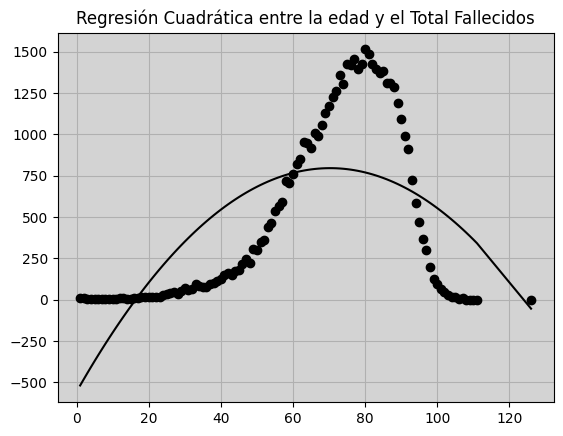

In [ ]:
# @title Visualización Antes
visualizar_regresion_cuadratica(df_final.edad, df_final.confirmada, sol0[0], sol0[1], sol0[2], "Total Fallecidos")

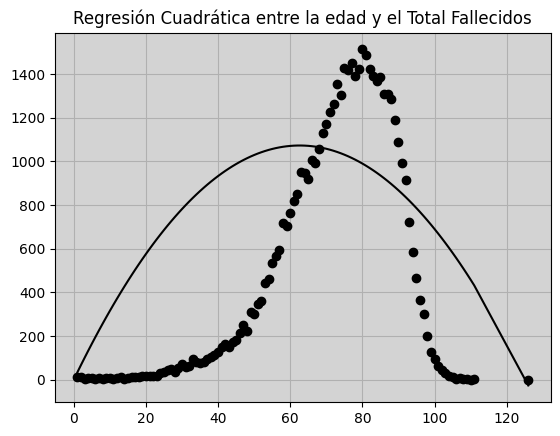

In [ ]:
# @title Visualización Ahora: Gráfico Final
visualizar_regresion_cuadratica(df_final.edad, df_final.confirmada, 0, negativo, positive, "Total Fallecidos")

In [ ]:
# @title Comparar el error cuadratico medio de la primera función calculada con la ajustada

error_anterior = ecm(df_final.confirmada,sol0[0], sol0[1], sol0[2])
error_actual = ecm(df_final.confirmada,0,negativo,positive)

print(f"Error de la primera función: {error_anterior}")
print(f"Error de la función con ajuste: {error_actual}")

Error de la primera función: 382.03020863633293
Error de la función con ajuste: 509.6189203888006


Esto es debido a que la primera función es la optima, pero debido a la restricción de ser una funcion sin valores negativos se tuvo que ajustar a uno menos optimo pero cumpliendo con la restricción.

# Resumen
Función de correlación : y = -556 + 38 * x - 0.2736 * x^2.
Índice de correlación hasta el peak de fallecidos: 0.90.
Índice de correlación desde el peak de fallecidos: -0.89.
Conclusiones finales: Existe una alta correlación entre el número de fallecidos y la edad de la persona dependiendo de su edad. La correlación se modela en una campana, donde, el máximo de fallecidos resulta en edad 80. Cabe destacar que puede existir cierto sesgo de las interpretaciones, ya que puede haber una menor población en edad mayor a 80 y eso podría provocar el declive en la correlación. Asímismo para edades muy jovenes.

# Desarrollo : Trabajo con Contagiados

## Importar datos

In [ ]:
df2 = pd.read_csv("CasosGeneroEtario.csv")
df_aux2 = df2
df2 = df_aux2.groupby(["Grupo de edad"], dropna = True).sum()
df2 = df2.reset_index()
df2 = df2[["Grupo de edad", "05-01-2023"]]
df2 = df2.rename(columns={'05-01-2023': 'Total Contagiados'})
df2.loc[16, "Grupo de edad"] = "80 - 120 años"
df2.loc[0, "Grupo de edad"] = "0 - 4 años"
df2.loc[1, "Grupo de edad"] = "5 - 9 años"
# Dividir el rango en dos valores numéricos
df2['Valor Mínimo'] = df2['Grupo de edad'].str.extract(r'(\d+) - \d+').astype(int)
df2['Valor Máximo'] = df2['Grupo de edad'].str.extract(r'\d+ - (\d+)').astype(int)
df2["Grupo de edad"] = df2["Valor Máximo"]

for i in range(1, len(df2), 2):
  df2.loc[i, "Grupo de edad"] = df2.loc[i, "Valor Máximo"]
df2 = df2.drop(['Valor Mínimo', 'Valor Máximo'], axis=1)
df2

<ipython-input-119-874bd98d40d8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_aux2.groupby(["Grupo de edad"], dropna = True).sum()


,Grupo de edad,Total Contagiados
0,4,157061
1,9,180795
2,14,252666
3,19,304959
4,24,445980
5,29,579516
6,34,602922
7,39,498120
8,44,431469
9,49,400535


## Edad Peak Contagiados

In [ ]:
edad_peak_c = conseguir_edad_peak(df2)
print("La edad peak de los contagiados es", edad_peak_c)

La edad peak de los contagiados es 34


In [ ]:
sol = obtener_coeficientes_funciones(df2)

y = 270201.5466614613 + 4919.88129773834 * x - 60.498894693826344 * x^2


Se puede ver que la solución para los coeficientes de $a_{0}, a_{1}, a_{2}$ son:

$a_{0} = 270201.270201.5466614613 $

$a_{1} = 4919.88129773834 $

$a_{2} = -60.498894693826344 $

## Visualización : Gráfico Final

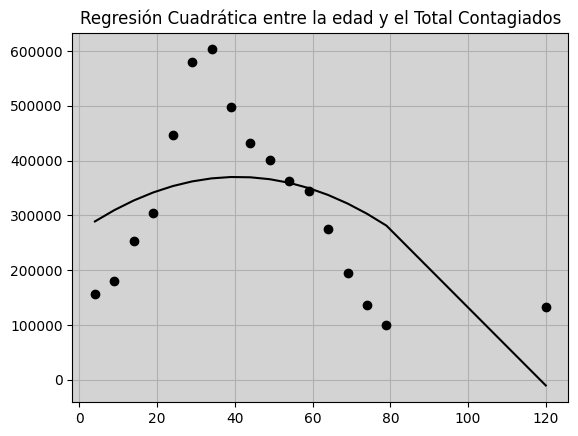

In [ ]:
visualizar_regresion_cuadratica(df2["Grupo de edad"], df2["Total Contagiados"], sol[0], sol[1], sol[2], "Total Contagiados")

# Validación y pruebas

## Validación Gráfica Fallecidos por Edad

In [ ]:
# @title librerias que contienen funciones para realizar una regresión

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Crear un objeto para realizar la regresion polinommica de grado 2
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(df_final.edad.values.reshape(-1,1))

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo en relacion al eje y
model.fit(x_poly, df_final.confirmada.values)

# obtener los valores "predecidos" usando el modelo
y_pred = model.predict(x_poly)

In [ ]:
def visualizacion_de_regresion_automatica(x, y, puntos, name,nombre_modelo):
  plt.scatter(x, puntos, color='red', label='Datos del csv')
  plt.plot(x, y, color='blue', label=nombre_modelo)
  plt.legend()
  plt.xlabel('Edad')
  plt.ylabel(name)
  plt.title(f"Regresión Cuadrática Automática entre la edad y el {name}")
  plt.gca().set_facecolor('lightgray')
  plt.show()

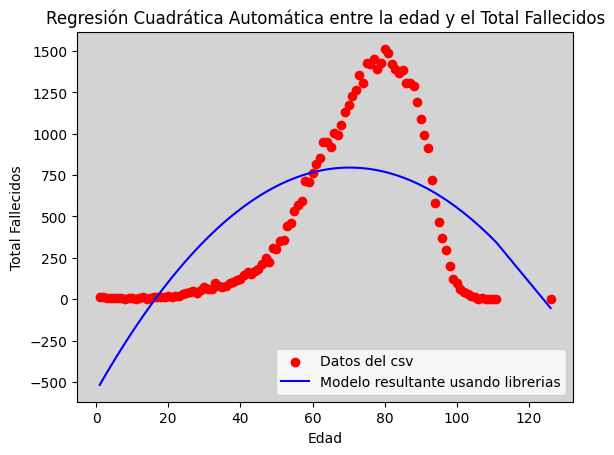

In [ ]:
# @title Regresion polinomica usando librerias
visualizacion_de_regresion_automatica(df_final.edad, y_pred, df_final.confirmada, "Total Fallecidos","Modelo resultante usando librerias")

## Validación Gráfica Fallecidos por Edad

In [ ]:
# Crear un objeto para realizar la regresion polinommica de grado 2
poly2 = PolynomialFeatures(degree = 2)
x_poly2 = poly.fit_transform(df2["Grupo de edad"].values.reshape(-1,1))

# Crear un modelo de regresión lineal
model2 = LinearRegression()

# Ajustar el modelo en relacion al eje y
model2.fit(x_poly2, df2["Total Contagiados"].values)

# obtener los valores "predecidos" usando el modelo
y_pred2 = model2.predict(x_poly2)

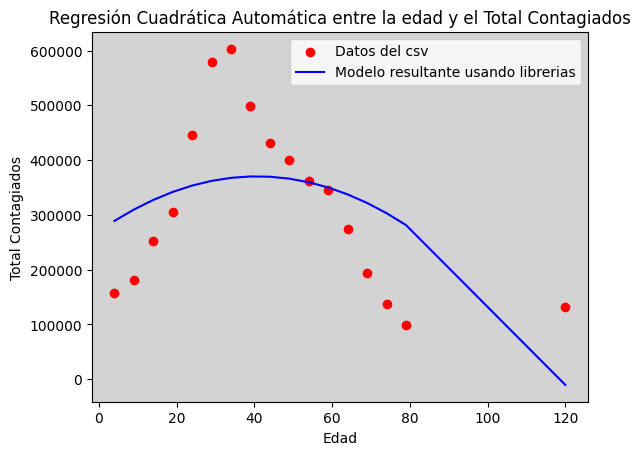

In [ ]:
# @title Regresion polinomica usando librerias
visualizacion_de_regresion_automatica(df2["Grupo de edad"], y_pred2, df2["Total Contagiados"], "Total Contagiados","Modelo resultante usando librerias")

## Mostramos los graficos de las regresiones calculadas por nosotros

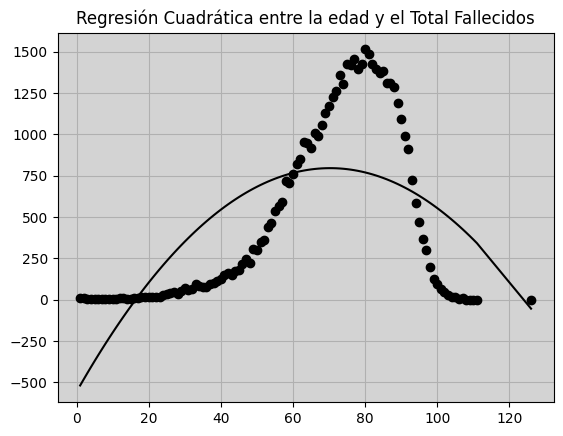

In [ ]:
# @title Regresion polinomica de Total Fallecidos sin el uso del ajuste
visualizar_regresion_cuadratica(df_final.edad, df_final.confirmada, sol0[0], sol0[1], sol0[2], "Total Fallecidos")

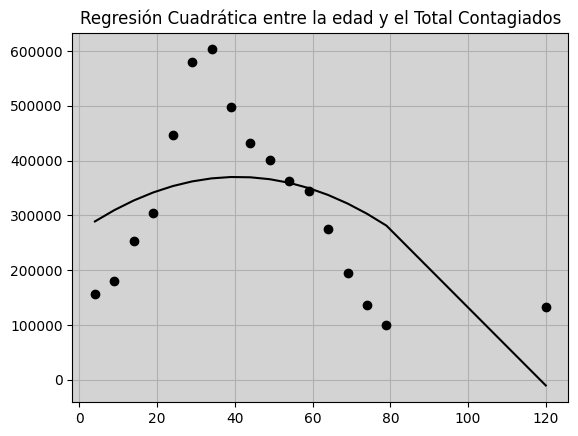

In [ ]:
# @title Regresion polinomica de Total Contagiados
visualizar_regresion_cuadratica(df2["Grupo de edad"], df2["Total Contagiados"], sol[0], sol[1], sol[2], "Total Contagiados")

### Comparación, regresión polinómica usando librerías con la calculada sin usarlas

#### Regresión polinómica de Edad y Total fallecidos

Resulta que esta es la misma curva que calculamos inicialmente, pero tuvimos que hacer un cambio debido a la restricción de no permitir valores negativos. No obstante, esto confirma que esta curva es la que mejor se ajusta a nuestros datos cuando se modela como una función polinómica de grado 2. En cuanto a la gráfica se puede notar una cierta inclinación hacia la izquierda, posiblemente debido a que la mayoría de los datos se concentran entre las edades $[0,40]$, si quisiéramos obtener una función que represente más los datos tendríamos que obtener un modelo utilizando más coeficientes o sea encontrar una función polinómica de grado mayor que dos.

#### Regresión polinómica de Edad y Total contagiados

Resulta en ser la misma gráfica, por lo que la función calculada por nosotros es correcta, pero aun así no resulta ser una función que represente muy bien los datos, principalmente porque se tiene un valor en el eje x (“edad”) muy alejado del resto de valores que resulta ser la edad de 120, este valor no puede ser simplemente eliminado debido a que representa a los mayores de 80 años por lo que resulta ser un valor importante para el dataset.

# Sobre el ajuste $a{0}, a{1}$ y $a{2}$ de la regresion Total fallecidos y Edad

Lo que busca estas funciones **NO** es encontrar los coeficientes más óptimos en general, ya que estos valores se calculan resolviendo la matriz pertinente de la regresión polinómica, sino más bien un valor alternativo que obtenga el menor error posible, pero lo que es más importante, cumpla con la restricción que te tiene que cumplir para nuestro caso en particular, esta consta de obtener una función que no tenga valores negativos, ya que estamos viendo que a partir de una edad hay una salida **NO** negativa de total fallecido.

## Que hace el ajuste

El ajuste busca una alternativa que busca cumplir con la restricción, esta se busca a partir de los coeficientes calculados de la matriz de la regresión polinómica, la alternativa encontrada depende de algunos factores, primero la variable “tasa”, esta es cuanto se le suma o restara al coeficiente y depende del valor que tipo de alternativas encontrara, el otro es cuantas veces sumara la tasa dentro de la variable for, mientras mayor el valor más alternativas tomara y comparara entre ellas, al final del for se entregara la alternativa que cumple con la restricción y haya tenido el menor error entre todas las alternativas obtenidas.

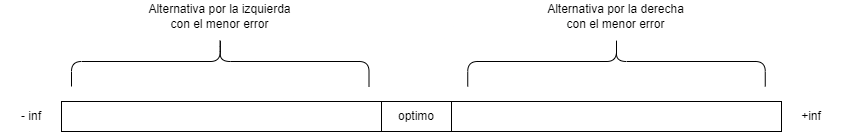

Después de obtener las dos alternativas, tanto el de la izquierda como el de la derecha, se comparan sus errores y nos quedaremos con el que tenga el menor error de los dos.

## Que obtenemos finalmente

Se obtiene un nuevo coeficiente que no provoca valores negativos cumpliendo con la restricción y que tiene el menor error posible, eso sí hay que tener en cuenta que este valor si es distinto del coeficiente calculado originalmente nunca será el más óptimo.